In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, exp, log
from scipy.optimize import newton, bisect
import sys

np.set_printoptions(linewidth=132, suppress=True)

In [2]:
from pstudio import AE
ae = AE('Ti', xcname='LDA', relativity='SR', out='-')
ae.run()


scalar relativistic atomic calculation for Ti (Titanium, Z=22)
configuration: 1s2 2s2 2p6 3s2 3p6 3d2 4s2, 22 electrons
exchange-correlation: lda_x+lda_c_pz
2001 radial gridpoints in [1e-05,100]

Converged in 79 iterations

Energy contributions:
------------------------------------------------------------------------
Kinetic:     +859.267476 Ha    +23381.858978 eV 
Ionic:      -2027.805889 Ha    -55179.408778 eV 
Hartree:     +356.541188 Ha     +9701.979897 eV 
XC:           -40.059926 Ha     -1090.086121 eV 
------------------------------------------------------------------------
Total:       -852.057093 Ha    -23185.654457 eV 

state      eigenvalue      eigenvalue        rmax
------------------------------------------------------------------------
1s2       -178.635333 Ha -4860.914990 eV    0.045
2s2        -19.697670 Ha  -536.000898 eV    0.270
2p6        -16.331804 Ha  -444.411024 eV    0.219
3s2         -2.290205 Ha   -62.319649 eV    0.868
3p6         -1.426572 Ha   -38.818997 

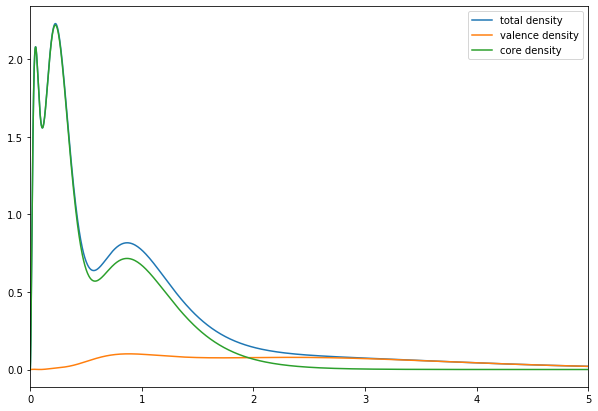

In [16]:
r = ae.rgd.r
ae.calculate_density()
rhotot = ae.n.copy()
ae.calculate_density([(4,0,2), (3,2,2)])
rhoval = ae.n.copy()
rhocore = rhotot - rhoval

# plot density
plt.figure(figsize=(10,7))
plt.plot(r, rhotot*r*r, label='total density')
plt.plot(r, rhoval*r*r, label='valence density')
plt.plot(r, rhocore*r*r, label='core density')
plt.xlim(0,5)
plt.legend()
plt.show(block=False)

0.7813995847307229 0.7813995847307229


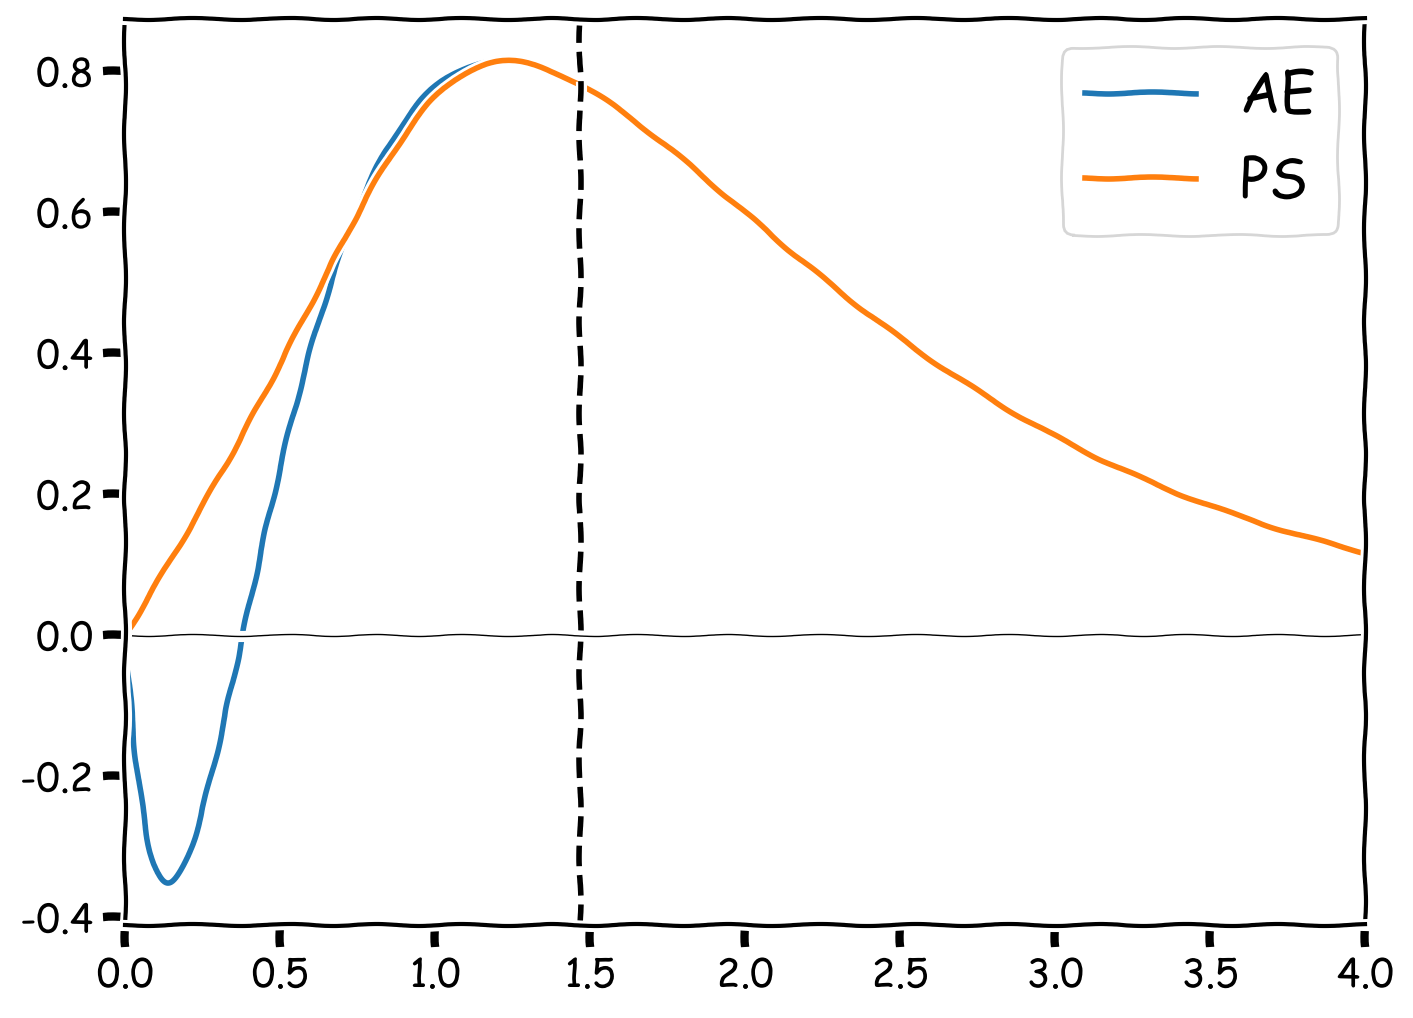

In [21]:
ps2s = ae2s.copy()
ps2s[:g] = TM_function(r[:g], l, c)
print(ae_deriv[0], TM_function(rc, l, c))

plt.xkcd(randomness=2)
fig = plt.figure(figsize=(8,6), dpi=200)
plt.plot(r, ae2s, label='AE')
plt.plot(r, ps2s, label='PS')
plt.axvline(rc, color='black', linestyle='dashed')
plt.axhline(0, color='black', linewidth=0.5)
plt.xlim(0,4)
plt.legend(fontsize=20)
#plt.grid()
plt.savefig('pstudio.png', bbox_inches='tight')
plt.show()

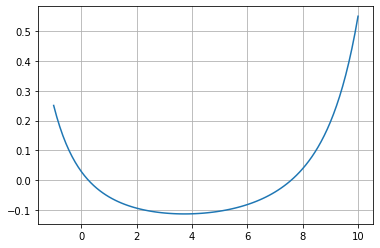

In [11]:
c2range = np.linspace(-1,10,100)
diff = np.zeros_like(c2range)
for i in range(len(c2range)):
    diff[i] = TM_calc_residual(c2range[i], ae_norm, ae_deriv, ae.rgd, rc, l)
plt.plot(c2range, diff)
plt.grid()
plt.show()